In [1]:
!pip uninstall tensorflow
!pip uninstall kerasy

Found existing installation: tensorflow 2.6.0+zzzcolab20220506153740
Uninstalling tensorflow-2.6.0+zzzcolab20220506153740:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/import_pb_to_tensorboard
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.7/dist-packages/tensorflow-2.6.0+zzzcolab20220506153740.dist-info/*
    /usr/local/lib/python3.7/dist-packages/tensorflow/*
Proceed (y/n)? y
  Successfully uninstalled tensorflow-2.6.0+zzzcolab20220506153740


In [2]:
!pip install tensorflow==2.6.0
!pip install keras==2.6.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 564.4 MB 1.8 kB/s 
  Using cached typing_extensions-3.7.4.3-py3-none-any.whl (22 kB)
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 4.3.0
    Uninstalling typing-extensions-4.3.0:
      Successfully uninstalled typing-extensions-4.3.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
xarray-einstats 0.2.2 requires numpy>=1.21, but you have numpy 1.19.5 which is incompatible.
black 22.6.0 requires typing-extensions>=3.10.0.0; python_version < "3.10", but you have typing-extensions 3.7.4.3 which is incompatible.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!pip3 install pixellib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached typing_extensions-4.3.0-py3-none-any.whl (25 kB)
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 3.7.4.3
    Uninstalling typing-extensions-3.7.4.3:
      Successfully uninstalled typing-extensions-3.7.4.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
xarray-einstats 0.2.2 requires numpy>=1.21, but you have numpy 1.19.5 which is incompatible.
thinc 8.1.0 requires typing-extensions<4.2.0,>=3.7.4.1; python_version < "3.8", but you have typing-extensions 4.3.0 which is incompatible.
tensorflow 2.6.0+zzzcolab20220506153740 requires typing-extensions~=3.7.4, but you have typing-extensions 4.3.0 which is incompatible.
spacy 3.4.1 requires typing-extensions<4.2.0,>=3.7.4; python_version < "3.8", but you have t

In [4]:
from importlib_metadata import version
import cv2
import pixellib

print(cv2.__version__)
print(version('pixellib'))

4.6.0
0.7.1


In [5]:
import os
import urllib
import cv2
import numpy as np
from pixellib.semantic import semantic_segmentation
from matplotlib import pyplot as plt


(1024, 768, 3)


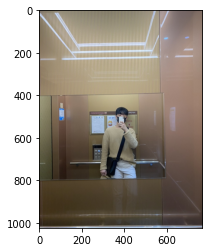

In [22]:
img_path = ("/content/drive/MyDrive/Colab Notebooks/make_human_camera/E49349CF-9B06-4F63-967E-AE9487CC46BF_1_105_c.jpeg")  
img_orig = cv2.imread(img_path) 

print(img_orig.shape)
plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
plt.show()

In [23]:
# 저장할 파일 이름을 결정합니다

model_file = ('/content/drive/MyDrive/Colab Notebooks/make_human_camera/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5')
# PixelLib가 제공하는 모델의 url입니다
model_url = 'https://github.com/ayoolaolafenwa/PixelLib/releases/download/1.1/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5'

# 다운로드를 시작합니다
urllib.request.urlretrieve(model_url, model_file)

('/content/drive/MyDrive/Colab Notebooks/make_human_camera/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5',
 <http.client.HTTPMessage at 0x7f63de9af390>)

In [24]:
model = semantic_segmentation()
model.load_pascalvoc_model(model_file)

In [25]:
segvalues, output = model.segmentAsPascalvoc(img_path)

In [26]:
LABEL_NAMES = [
    'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
    'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
    'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv'
]
len(LABEL_NAMES)

21

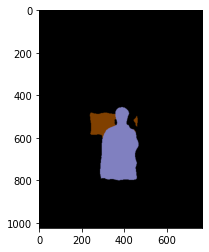

In [27]:
plt.imshow(output)
plt.show()

In [28]:
segvalues

{'class_ids': array([ 0, 15, 20]),
 'masks': array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]])}

In [29]:
for class_id in segvalues['class_ids']:
    print(LABEL_NAMES[class_id])

background
person
tv


In [30]:
colormap = np.zeros((256, 3), dtype = int)
ind = np.arange(256, dtype=int)

for shift in reversed(range(8)):
    for channel in range(3):
        colormap[:, channel] |= ((ind >> channel) & 1) << shift
    ind >>= 3

colormap[:20]

array([[  0,   0,   0],
       [128,   0,   0],
       [  0, 128,   0],
       [128, 128,   0],
       [  0,   0, 128],
       [128,   0, 128],
       [  0, 128, 128],
       [128, 128, 128],
       [ 64,   0,   0],
       [192,   0,   0],
       [ 64, 128,   0],
       [192, 128,   0],
       [ 64,   0, 128],
       [192,   0, 128],
       [ 64, 128, 128],
       [192, 128, 128],
       [  0,  64,   0],
       [128,  64,   0],
       [  0, 192,   0],
       [128, 192,   0]])

In [31]:
colormap[15]

array([192, 128, 128])

In [32]:
seg_color = (128,128,192)

(1024, 768)


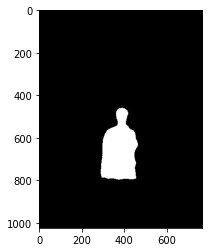

In [33]:
seg_map = np.all(output==seg_color, axis=-1)
print(seg_map.shape)
plt.imshow(seg_map, cmap='gray')
plt.show()

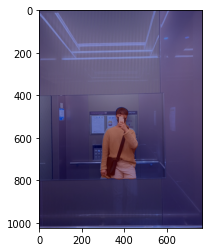

In [34]:
img_show = img_orig.copy()

# True과 False인 값을 각각 255과 0으로 바꿔줍니다
img_mask = seg_map.astype(np.uint8) * 255

# 255와 0을 적당한 색상으로 바꿔봅니다
color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)

# 원본 이미지와 마스트를 적당히 합쳐봅니다
# 0.6과 0.4는 두 이미지를 섞는 비율입니다.
img_show = cv2.addWeighted(img_show, 0.6, color_mask, 0.4, 0.0)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

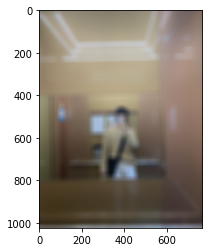

In [44]:
# (13,13)은 blurring kernel size를 뜻합니다
# 다양하게 바꿔보세요
img_orig_blur = cv2.blur(img_orig, (30,30))  
plt.imshow(cv2.cvtColor(img_orig_blur, cv2.COLOR_BGR2RGB))
plt.show()

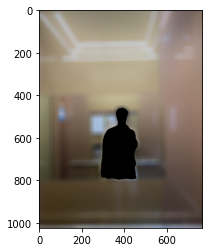

In [45]:
img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)
img_bg_mask = cv2.bitwise_not(img_mask_color)
img_bg_blur = cv2.bitwise_and(img_orig_blur, img_bg_mask)
plt.imshow(cv2.cvtColor(img_bg_blur, cv2.COLOR_BGR2RGB))
plt.show()

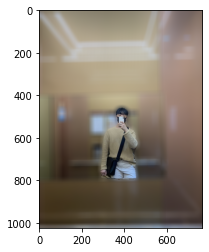

In [46]:
img_concat = np.where(img_mask_color==255, img_orig, img_bg_blur)
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

# 회고

초기에 라이브러리를 불러오는 과정에서 계속 빨간불이 뜨길래 라이브러리를 잘못 적었나? 왜 안되지라고 계속 생각을 하였고 텐서플로우의 버전이 높아서 실행이 되지 않는다는 것을 알게 되었다. 이후 구버전으로 새로 설치하니 잘 되었다.  

처음에 사진의 흐릿한 정도가 덜 하길래 음... 사진에서 배경과 인물이 잘 구분되지 않는 건가.. 사진이 잘못된 건가 하고 사진을 바꿨었는데도 똑같이 나와, 뭐가 문제인지 코드에 대해서 다시한번 보게 되었다. img_orig_blur = cv2.blur(img_orig, (30,30)) 이 코드가 사진 주변의 흐림 정도를 판단하는 코드였던 것을 알게 되었다. 초기에 10으로 설정되어 있어 덜 흐리게 보여서 이후 20, 30으로 변경하여 코드를 진행하여 보니 30에서 현재와 같은 흐림도를 보이는 것을 알 수 있었다. 